1. Instance Based Learning vs Model Based Learning
===

In the first course in this step, **Machine Learning Fundamentals**, we walked through the full machine learning workflow using the k-nearest neighbors algorithm. K-nearest neighbors works by finding similar, labelled examples from the training set for each instance in the test set and uses them to predict the label. K-nearest neighbors is known as an [instance-based learning](https://en.wikipedia.org/wiki/Instance-based_learning) algorithm because it relies completely on previous instances to make predictions. The k-nearest neighbors algorithm doesn't try to understand or capture the relationship between the feature columns and the target column.

Because the entire training dataset is used to find a new instance's nearest neighbors to make label predictions, this algorithm doesn't scale well to medium and larger datasets. If we have a million instances in our training data set and we want to make predictions for a hundred thousand new instances, we'd have to sort the million instances in the training set by Euclidean distance for each instance. The following diagram provides an overview of the complexity of k-nearest neighbors:


<img width="900" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1HyK6Ug4KJ7ZTYIsAnha9UHoVxrEGREDv">


We need to instead learn about **parametric machine learning** approaches, like linear regression and logistic regression. Unlike the k-nearest neighbors algorithm, the result of the training process for these machine learning algorithms is a mathematical function that best approximates the patterns in the training set. In machine learning, this function is often referred to as a **model**.

In this course, we'll explore the most commonly used machine learning model -- the **linear regression model**. Parametric machine learning approaches work by making assumptions about the relationship between the features and the target column. In linear regression, the approximate relationship between the feature columns and the target column is expressed as a linear regression equation:

$$y=a_1x_1+a_2x_2+a_3x_3+...+a_nx_n$$


The following diagram provides an overview of the machine learning process for linear regression. For now, the goal isn't to understand the entire process but more to compare and contrast with the **nonparametric** approach of k-nearest neighbors.

<img width="900" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1cKHRMMKvTljQ8aotpnbzSeXdlDgqd7bG">

In this mission, we'll provide an overview of how we use a linear regression model to make predictions. We'll use scikit-learn for the model training process, so we can focus on gaining intuition for the model-based learning approach to machine learning. In later missions in this course, we'll dive the math behind how a model is fit to the dataset, how to select and transform features, and more.

In the next screen, we'll introduce the dataset we'll be using throughout this course.

2. Introduction to the data
===

To get familiar with this machine learning approach, we'll work with a dataset on sold houses in Ames, Iowa. Each row in the dataset describes the properties of a single house as well as the amount it was sold for. In this course, we'll build models that predict the final sale price from its other attributes. Specifically, we'll explore the following questions:

- Which properties of a house most affect the final sale price?
- How effectively can we predict the sale price from just its properties?

This dataset was originally compiled by [Dean De Cock](http://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression. You can read more about his process and motivation [here](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf) and download the dataset [here](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt).

Here are some of the columns:

- **Lot Area**: Lot size in square feet.
- **Overall Qual**: Rates the overall material and finish of the house.
- **Overall Cond**: Rates the overall condition of the house.
- **Year Built**: Original construction date.
- **Low Qual Fin SF**: Low quality finished square feet (all floors).
- **Full Bath**: Full bathrooms above grade.
- **Fireplaces**: Number of fireplaces.

Let's start by generating train and test datasets and getting more familiar with the data.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**: 

- Read **AmesHousing.txt** into a dataframe using the tab delimiter (**\t**) and assign to **data**.
- Select the first **1460** rows from **data** and assign to **train**.
- Select the remaining rows from **data** and assign to **test**.
- Use the **dataframe.info()** method to display information about each column.
- Read the [data documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt) to get more familiar with each column.
- Using the data documentation, determine which column is the target column we want to predict. Assign the column name as a string to **target**.

In [9]:
import pandas as pd
data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

print(train.info())
target = 'SalePrice'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

3. Simple Linear Regression
==

We'll start by understanding the univariate case of linear regression, also known as **simple linear regression**. The following equation is the general form of the simple linear regression model.

$$\hat{y}=a_1x_1+a_0$$

$\hat{y}$ represents the target column while $x_1$ represents the feature column we choose to use in our model. These values are independent of the dataset. On the other hand, $a_0$ and $a_1$ represent the **parameter** values that are specific to the dataset. The goal of simple linear regression is to find the optimal parameter values that best describe the relationship between the feature column and the target column. The following diagram shows different simple linear regression models depending on the data:

<img width="500" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1aYSv01fP3tEoEukxRmMZFcfJwZfzS-UV">


The first step is to select the feature, $x_1$, we want to use in our model. Once we select this feature, we can use scikit-learn to determine the optimal parameter values $a_1$ and $a_0$ based on the training data. Because one of the assumptions of linear regression is that the relationship between the feature(s) and the target column is linear, we want to pick a feature that seems like it has the strongest correlation with the final sale price.

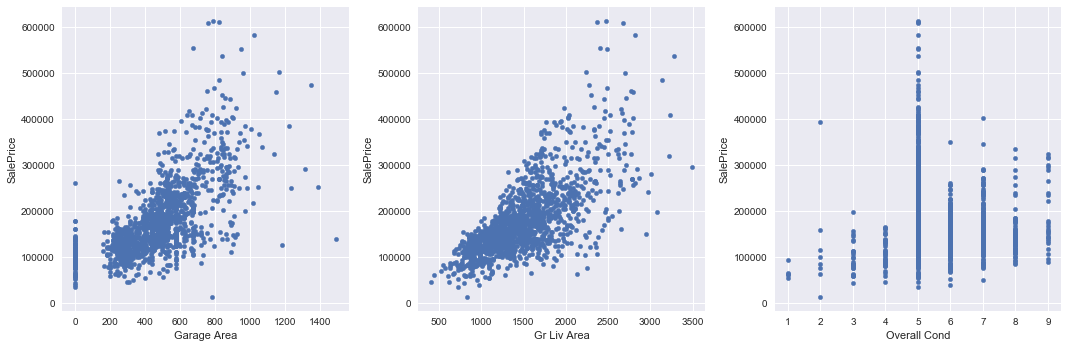

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.tight_layout()
plt.show()

4. Least Squares
==

From the last screen, we can tell that the **Gr Liv Area** feature correlates the most with the **SalePrice** column. We can confirm this by calculating the correlation between pairs of these columns using the [pandas.DataFrame.corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) method:

In [14]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000



The correlation between **Gr Liv Area** and **SalePrice** is around 0.698990, which is the highest. Recall that the closer the correlation coefficient is to 1.0, the stronger the correlation. Here's the updated form of our model:

$$\hat{y}=a_1∗Gr \ Liv \ Area+a_0$$

Let's now move on to understanding the model fitting criteria.

### 4.1 Residual Sum Of Squares

To find the optimal parameters for a linear regression model, we want to optimize the model's residual sum of squares (or [RSS](https://en.wikipedia.org/wiki/Residual_sum_of_squares)). If you call, residual (often referred to as errors) describes the difference between the predicted values for the target column ($\hat{y}$) and the true values ($y$):


<img width="150" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=154sWwnilnUvyrfe2QlfL6uyylRxh3hL0">


We want this difference to be as small as possible. Calculating RSS involves summing the squared errors:

$$RSS=(y_1−\hat{y}_1)^2+(y_2−\hat{y}_2)^2+\ldots+(y_n−\hat{y}_n)^2$$

We can shorten this to:

$$RSS=\sum_{i=1}^n(y_i−\hat{y}_i)^2$$

If you recall, the calculation for RSS seems very similar to the calculation for MSE (mean squared error). Here's the formula for MSE, adapted for our new notation:


$$MSE=\frac{1}{n}\sum_{i=1}^n(y_i−\hat{y}_i)^2$$



While we used the MSE on the test set, it's clear that the goal of minimizing RSS on the training set when training is a good idea.


In [15]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [59]:
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider, Paragraph
import numpy as np

# create scatter dataset
source = ColumnDataSource(train)

# initial linear regression model
x = np.linspace(0,1600,1000)
y = 250*x + 0

# create linear regression dataset
source_reg = ColumnDataSource(data=dict(x=x, y=y))

# create a figure
p = figure(x_axis_label = 'Garage Area',
           y_axis_label = 'SalePrice',
           plot_width = 400,
           plot_height = 400)

# scartter plot
p.circle(source=source, x="Garage Area", y="SalePrice")

# regression plot
p.line('x', 'y', source=source_reg, line_width=3, line_alpha=0.6, color='red')


# interactive part
update_curve = CustomJS(args=dict(source=source_reg,
                                 source2=source), code="""
    var data = source.data;
    var data2 = source2.data;
    x = data['x']
    y = data['y']
    x_real = data2['Garage Area']
    y_real = data2['SalePrice']
    a_0 = slider_a0.value;
    a_1 = slider_a1.value;
    rss = 0
    for (i = 0; i < x.length; i++) {
       y[i] = x[i]*a_1 + a_0
    }
    for (i = 0; i < x_real.length; i++){
        y_hat = a_1*x_real[i] + a_0
        rss = rss + Math.pow(y_real[i] - y_hat,2)
    }
    paragraph.text = "RSS = " + rss.toString()
    source.change.emit();
""")


slider_a1 = Slider(start=-1000.0, end=6000, value=0, step=1, 
                  title="A1", callback=update_curve)
update_curve.args["slider_a1"] = slider_a1

slider_a0 = Slider(start=-300000, end=300000, value=0, step=1000, 
                  title="A0",callback=update_curve)
update_curve.args["slider_a0"] = slider_a0

paragraph = Paragraph(text="RSS = ---")
update_curve.args["paragraph"] = paragraph


show(column(paragraph,p,slider_a1, slider_a0))


show(p)

5. Using Scikit-Learn To Train And Predict
==

Let's now use scikit-learn to find the optimal parameter values for our model. The scikit-learn library was designed to easily swap and try different models. Because we're familiar with the scikit-learn workflow for k-nearest neighbors, switching to using linear regression is straightforward.

Instead of working with the **sklearn.neighbors.KNeighborsRegressors** class, we work with the **sklearn.linear_model.LinearRegression** class. The **LinearRegression** class also has it's own **fit()** method. Specific to this model, however, is the **coef_** and **intercept_** attributes, which return a1 (a1 to an if it were a multivariate regression model) and a0 accordingly.


In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['Garage Area']], train['SalePrice'])
print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[ 244.61694129]
63815.5620263


6. Making Predictions
==

In the last step, we fit a univariate linear regression model between the **Gr Liv Area** and **SalePrice** column. We then displayed the single coefficient and the residuel value. If we refer back to the format of our linear regression model, the fitted model can be represented as:

$$\hat{y}=116.86624683x_1+5366.82171006$$


One way to interpret this model is "for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars".

We can now use the **predict()** method to predict the labels using the training data and compare them with the actual labels. To quantify the fit, we can use mean squared error. Let's also perform simple validation by making predictions on the test set and calculate the **MSE** value for those predictions as well.

In [66]:
import numpy as np
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.3620014
57088.2516126


7. Multiple Linear Regression
==

Now that we've explored the basics of simple linear regression, we can extend what we've learned to the multivariate case (often called **multiple linear regression**). A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column. Here's what the formula looks like:

$$\hat{y}=a_0+a_1x_1+a_2x_2+...+a_nx_n$$

When using multiple features, the main challenge is **selecting relevant features**. In a later mission in this course, we'll dive into some approaches for feature selection. For now, let's train a model using the following columns from the dataset to see how train and test RMSE values are improved.

- Overall Cond
- Gr Liv Area


In [67]:
cols = ['Overall Cond', 'Gr Liv Area']

lr.fit(train[cols], train['SalePrice'])

train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

print(train_rmse_2)
print(test_rmse_2)

56032.3980153
57066.9077945


8. Next steps
==

In this mission, we explored the basics of linear regression for machine learning. In the next two missions, we'll dive deeply into 2 different approaches for fitting a linear regression model.